## Regular Gradient Descent

In [4]:
from random import randint

def func(x:float):
    return x**2-4*x+1

def gradient_func(x:float):
    return 2*x - 4

def random_initialize():
    x = randint(-20, 20)
    return x

def step(x,r):
    x = x - r * gradient_func(x)
    return x


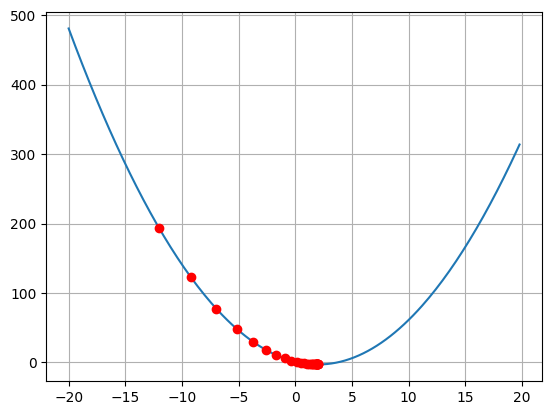

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(steps=10, r=0.1):
    x = np.arange(-20., 20., 0.2)
    y = np.array([func(val) for val in x])
    plt.plot(x,y)
    cur_x = random_initialize()
    for i in range(steps):
        plt.plot(cur_x, func(cur_x), color='red', marker='o')
        cur_x = step(cur_x, r)

    plt.grid()
    plt.show()

gradient_descent(steps=30)

## Momentum Optimization

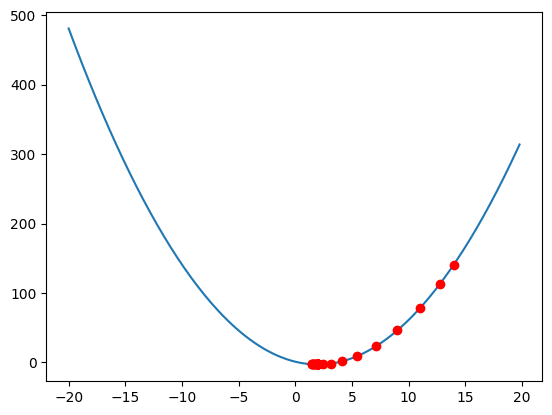

In [10]:
def momentum_step(x,r,b,m):
    m = b*m - r * gradient_func(x)
    x = x + m
    return m,x

def momentum_gradient_descent(steps=10, r=0.1, beta=0.1):
    x = np.arange(-20., 20., 0.2)
    y = np.array([func(val) for val in x])
    plt.plot(x,y)
    cur_x = random_initialize()
    momentum = 0
    for i in range(steps):
        plt.plot(cur_x, func(cur_x), color='red', marker='o')
        momentum, cur_x = momentum_step(cur_x, r, beta, momentum)

    plt.show()

momentum_gradient_descent(steps=30, r=0.05, beta=0.6)
